In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
irisdf=pd.read_csv(r"C:\Users\ibast\Downloads\IRIS.xls")

In [5]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
irisdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
irisdf.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

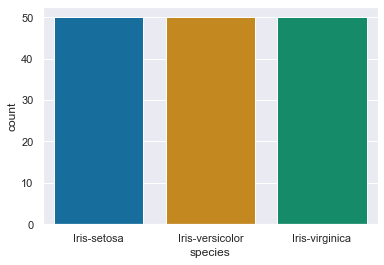

In [26]:
sns.countplot(x='species',data=irisdf)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

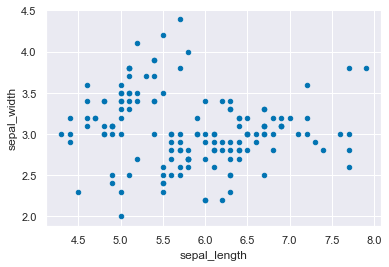

In [27]:
irisdf.plot(kind="scatter", x="sepal_length", y="sepal_width")

C:\Users\ibast\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


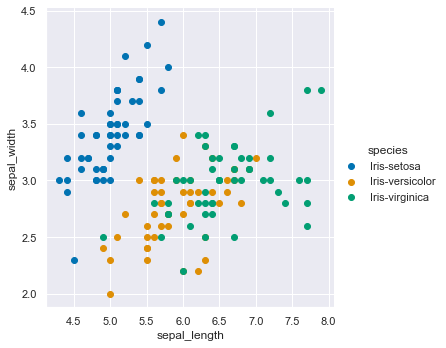

In [28]:
sns.FacetGrid(irisdf, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

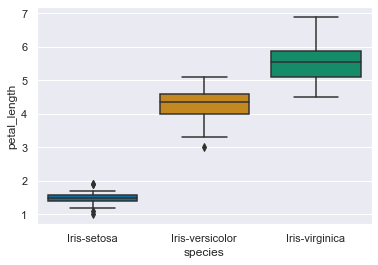

In [29]:
sns.boxplot(x="species", y="petal_length", data=irisdf)

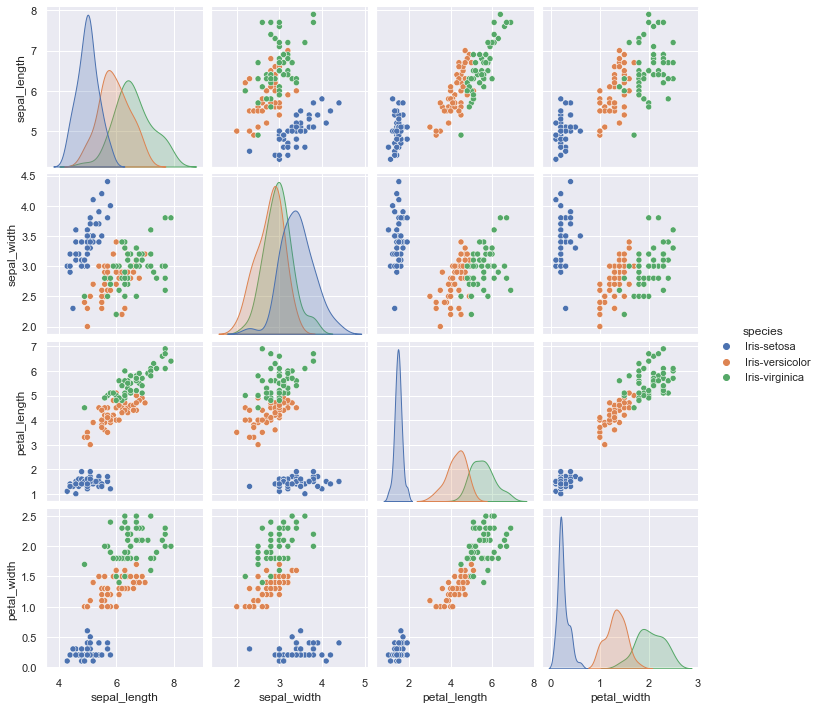

In [7]:
sns.pairplot(irisdf, hue='species')

In [8]:
irisdf_setosa = irisdf[irisdf['species'] == 'Iris-setosa']
irisdf_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


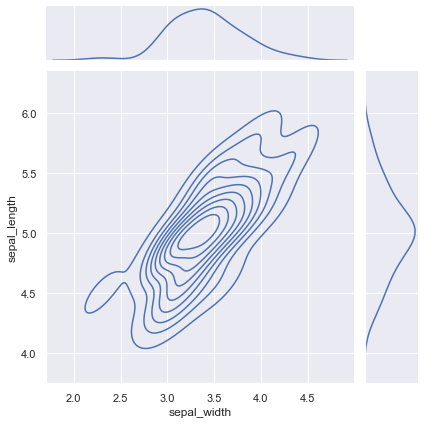

In [9]:
sns.jointplot(x='sepal_width', y='sepal_length', data=irisdf_setosa, kind='kde')
plt.show()

#### Splitting data into training and testing datasets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = irisdf.drop('species', axis=1)
y = irisdf['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [12]:
# Training the model
from sklearn.svm import SVC

In [13]:
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [14]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
y_pred = svm_classifier.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [18]:
svm_classifier.score(X_train, y_train)

0.9904761904761905